# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import svm_method
import random_forest_method

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from decision_tree.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

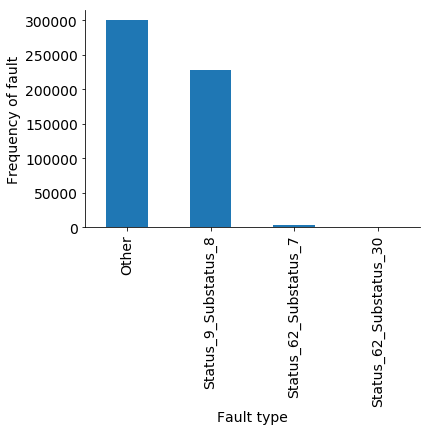

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.get_statues_percentage(undersampled_data, 'Undersampled dataset to max size 300 000:\n')
data_sampling.plot_balance(undersampled_data, 'Status')

In [4]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [5]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

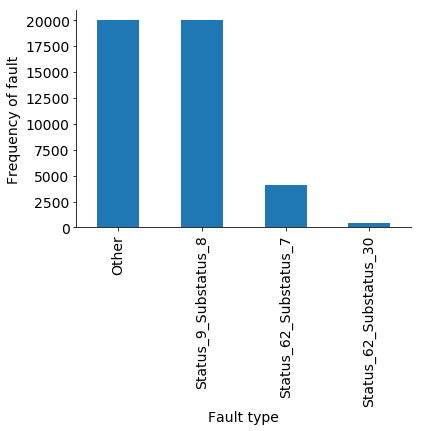

<Figure size 1440x1152 with 0 Axes>

In [6]:
data_sampling.get_statues_percentage(undersampled_data, 'Undersampled dataset to max size 20 000:\n')
data_sampling.plot_balance(undersampled_data, 'Status')

In [7]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,06-04-2018 07:04:00,-4.800000,6.2,11.620000,340.0,0.0,17.0,21.0,23.0,14.0,...,64.0,26.0,34.0,2.0,9.0,13.0,36.0,15.650000,335.200012,Status_62_Substatus_7
1,27-06-2019 17:36:00,4.800000,6.1,13.820000,253.0,386.0,23.0,35.0,31.0,22.0,...,45.0,35.0,43.0,8.0,-20.0,21.0,37.0,1.000000,257.799988,Status_9_Substatus_8
2,06-05-2019 08:22:30,-20.700001,2.4,6.610000,45.0,5.0,14.0,24.0,20.0,15.0,...,38.0,26.0,29.0,5.0,12.0,15.0,25.0,1.000000,24.299999,Other
3,14-11-2017 14:55:00,4.000000,7.7,16.440001,147.0,667.0,20.0,37.0,25.0,5.0,...,31.0,22.0,44.0,6.0,26.0,31.0,66.0,1.000000,208.100006,Other
4,10-10-2018 08:03:00,-6.000000,4.9,0.000000,238.0,0.0,6.0,5.0,7.0,15.0,...,11.0,23.0,7.0,9.0,14.0,32.0,30.0,91.989998,232.000000,Other


In [8]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(44481,)

In [9]:
y.value_counts()

Other                     20000
Status_9_Substatus_8      20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

## Split into training and test

In [10]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [11]:
columns_for_data = X_train.columns

In [12]:
y_train.value_counts()

Status_9_Substatus_8      13400
Other                     13400
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [13]:
y_test.value_counts()

Status_9_Substatus_8      6600
Other                     6600
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[9.84090909e-01 4.54545455e-04 4.54545455e-03 1.09090909e-02]
 [1.41732283e-01 8.50393701e-01 0.00000000e+00 7.87401575e-03]
 [2.21893491e-03 0.00000000e+00 9.97781065e-01 0.00000000e+00]
 [1.53030303e-02 0.00000000e+00 0.00000000e+00 9.84696970e-01]]


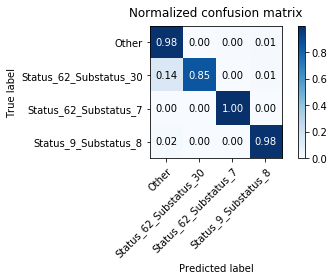

Total Accuracy 		0.984

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.982 		 0.984 		 0.983
Status_62_Substatus_30    	 0.973 		 0.850 		 0.908
Status_62_Substatus_7     	 0.978 		 0.998 		 0.988
Status_9_Substatus_8      	 0.989 		 0.985 		 0.987


In [14]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [15]:
rf.head()

,importance
ActivePower,0.139490
Log-T-Raw-Rectifier1HeatSink,0.096084
Log-T-Raw-TransformerTemperature,0.074242
Log-T-Raw-Rotor2Temperature,0.049492
Log-T-Raw-Rotor1Temperature,0.047074


## Scale dataset for SVM

In [16]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()


(29802, 34)
(14679, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.517961,0.278689,0.844894,0.334262,0.724698,0.618421,0.623529,0.370130,0.493506,0.520000,...,0.720430,0.686047,0.309091,0.329787,0.294118,0.6500,0.518519,0.656566,0.000000,0.524004
1,0.494206,0.060109,0.285222,0.345404,0.000000,0.368421,0.482353,0.246753,0.467532,0.493333,...,0.311828,0.348837,0.454545,0.170213,0.235294,0.3625,0.500000,0.222222,0.000000,0.515424
2,0.477115,0.226776,0.082292,0.289694,0.000000,0.723684,0.658824,0.370130,0.831169,0.853333,...,0.376344,0.441860,0.800000,0.319149,0.764706,0.7375,0.703704,0.484848,0.636844,0.462513
3,0.494206,0.407104,0.905213,0.749304,0.893794,0.828947,0.964706,0.337662,0.597403,0.653333,...,0.634409,0.651163,0.345455,0.287234,0.450980,0.7375,0.611111,0.818182,0.073515,0.811645
4,0.487543,0.363388,0.877208,0.417827,0.815910,0.618421,0.705882,0.370130,0.623377,0.653333,...,0.688172,0.674419,0.563636,0.414894,0.352941,0.5250,0.407407,0.383838,0.000323,0.563841


## SVM method

### BALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.35106061 0.36424242 0.13136364 0.15333333]
 [0.08661417 0.76377953 0.09448819 0.05511811]
 [0.03106509 0.01257396 0.90236686 0.05399408]
 [0.09545455 0.25924242 0.01575758 0.62954545]]


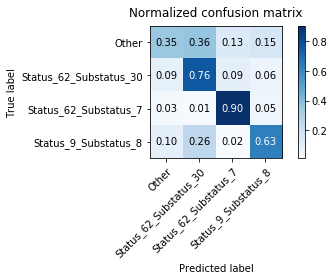

Plotting Performance Measure...
Total Accuracy 		0.531

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.772 		 0.351 		 0.483
Status_62_Substatus_30    	 0.023 		 0.764 		 0.045
Status_62_Substatus_7     	 0.554 		 0.902 		 0.686
Status_9_Substatus_8      	 0.792 		 0.630 		 0.701


In [17]:
# Balanced
svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.83454545 0.         0.00909091 0.15636364]
 [0.91338583 0.         0.         0.08661417]
 [0.50961538 0.         0.43639053 0.05399408]
 [0.33454545 0.         0.         0.66545455]]


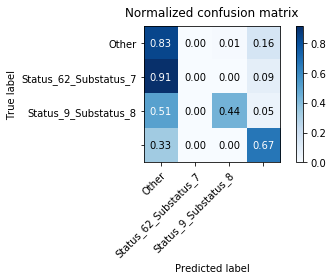

Plotting Performance Measure...
Total Accuracy 		0.715

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.646 		 0.835 		 0.729
Status_62_Substatus_7     	 0.908 		 0.436 		 0.589
Status_9_Substatus_8      	 0.797 		 0.665 		 0.725


In [18]:
# Unbalanced
svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique)

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote ,y_test_smote = sm.fit_resample(X_test_scaled, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [20]:
y1 = pd.DataFrame(X_train_scaled_smote)
y1[0].value_counts()

0.476327    325
0.510187    298
0.490674    293
0.505308    268
0.497561    265
           ... 
0.480102      1
0.495853      1
0.502419      1
0.500784      1
1.000000      1
Name: 0, Length: 20058, dtype: int64

### SMOTE and unbalanced weights (USE THIS RESULT Best results for 62_30)!

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[4.43787879e-01 3.39242424e-01 1.11666667e-01 1.05303030e-01]
 [1.42878788e-01 7.71363636e-01 8.03030303e-02 5.45454545e-03]
 [2.95454545e-02 9.09090909e-04 9.15606061e-01 5.39393939e-02]
 [1.13636364e-01 2.56212121e-01 1.51515152e-02 6.15000000e-01]]


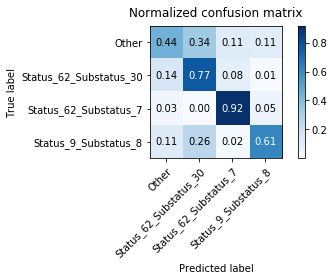

Plotting Performance Measure...
Total Accuracy 		0.686

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.608 		 0.444 		 0.513
Status_62_Substatus_30    	 0.564 		 0.771 		 0.652
Status_62_Substatus_7     	 0.816 		 0.916 		 0.863
Status_9_Substatus_8      	 0.789 		 0.615 		 0.691


In [21]:
svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [22]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(X_test_scaled_smote.shape)
print(y_test.shape)

(53600, 34)
(29802,)
(26400, 34)
(14679,)


Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[4.43787879e-01 3.39242424e-01 1.11666667e-01 1.05303030e-01]
 [1.42878788e-01 7.71363636e-01 8.03030303e-02 5.45454545e-03]
 [2.95454545e-02 9.09090909e-04 9.15606061e-01 5.39393939e-02]
 [1.13636364e-01 2.56212121e-01 1.51515152e-02 6.15000000e-01]]


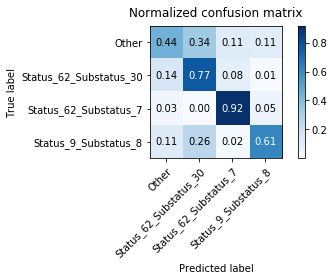

Plotting Performance Measure...
Total Accuracy 		0.686

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.608 		 0.444 		 0.513
Status_62_Substatus_30    	 0.564 		 0.771 		 0.652
Status_62_Substatus_7     	 0.816 		 0.916 		 0.863
Status_9_Substatus_8      	 0.789 		 0.615 		 0.691


In [23]:
# balanced with smote and undersampling
svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## Decision tree model

In [18]:
# Remove the features from the random forest model called rf
rf_df = pd.DataFrame(rf)
rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features


,Selected features for decision tree
0,ActivePower
1,Log-T-Raw-Rectifier1HeatSink
2,Log-T-Raw-TransformerTemperature
3,Log-T-Raw-Rotor2Temperature
4,Log-T-Raw-Rotor1Temperature
5,Log-T-Raw-Stator2Temperature


In [19]:
import numpy as np

X_train_scaled_with_names = (pd.DataFrame(X_train_scaled))
X_train_scaled_with_names.columns = columns_for_data

X_test_scaled_with_names = (pd.DataFrame(X_test_scaled))
X_test_scaled_with_names.columns = columns_for_data

# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]


X_train_scaled_removed = X_train_scaled_with_names[include_features.tolist()]
X_test_scaled_removed = X_test_scaled_with_names[include_features.tolist()]

# Printing df
X_test_scaled_removed.head()

,ActivePower,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-TransformerTemperature,Log-T-Raw-Rotor2Temperature,Log-T-Raw-Rotor1Temperature,Log-T-Raw-Stator2Temperature
0,0.000000,0.193548,0.232323,0.090476,0.094787,0.312500
1,0.000000,0.838710,0.292929,0.185714,0.199052,0.471591
2,0.000833,0.279570,0.323232,0.133333,0.137441,0.363636
3,0.008746,0.494624,0.444444,0.219048,0.227488,0.482955
4,0.668888,0.602151,0.606061,0.342857,0.345972,0.693182


Loading DT..
Training DT...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[8.77727273e-01 4.54545455e-04 2.56060606e-02 9.62121212e-02]
 [9.29133858e-01 2.36220472e-02 7.87401575e-03 3.93700787e-02]
 [6.87869822e-02 7.39644970e-04 9.14201183e-01 1.62721893e-02]
 [2.17878788e-01 0.00000000e+00 9.24242424e-03 7.72878788e-01]]


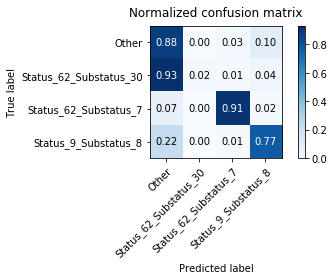

Plotting Performance Measure...
Total Accuracy 		0.827

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.778 		 0.878 		 0.825
Status_62_Substatus_30    	 0.429 		 0.024 		 0.045
Status_62_Substatus_7     	 0.843 		 0.914 		 0.877
Status_9_Substatus_8      	 0.885 		 0.773 		 0.825
depth 7


In [24]:
# Train DT on these features and print it out:
dt = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train, y_test,7)
print("depth",dt.get_depth())


In [27]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections


dot_data = tree.export_graphviz(dt,
                                feature_names=X_test_scaled_removed.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('brown', 'forestgreen')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

# Exporting image to current directory
graph.write_png('tree2.png')

True